Importing Packages

In [3]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import seaborn as sns
import requests
import os

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')





Libraries imported.


Importing dataframe

In [8]:
url = 'https://raw.githubusercontent.com/sitronco/Capstone/master/master.csv'
df = pd.read_csv(url)

df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Lets find all the columns that have a NaN value

In [9]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

First we notice that HDI for Year has Nan values, But I am not considering that column. Lets start our analysis by styduing the question:

How many suicides occured for 100000 population?

In [11]:
first_obs = df[["country","year","sex","age","suicides/100k pop"]]
first_obs.head()


,country,year,sex,age,suicides/100k pop
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


If we notice the range of the years is too big. For that reason we will group the data by decades. 

In [13]:
print("Min : ",first_obs.year.min())
print("Max : ",first_obs.year.max())
len(first_obs.year.unique())


Min :  1985
Max :  2016


32

In [16]:
def decade_mapping(data):
    if 1987<= data <= 1996:
        return "1987-1996"
    elif 1997<= data <= 2006:
        return "1997-2006"
    else:
        return "2007-2016"
first_obs.year = first_obs.year.apply(decade_mapping)

TypeError: unorderable types: int() <= str()

In [19]:
first_obs.sample()

,country,year,sex,age,suicides/100k pop
26938,United States,1987-1996,female,55-74 years,6.21


Now we can visualize the columns we are interested in the data vs the years.

1. Suicides based on Age, Gender

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

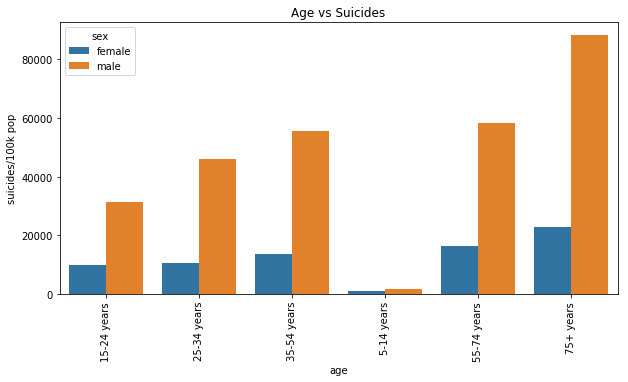

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = "suicides/100k pop", hue = "sex",data = first_obs.groupby(["age","sex"]).sum().reset_index()).set_title("Age vs Suicides")
plt.xticks(rotation = 90)

As you see, as the age increases, suicide rates is increasing irrespective of Gender

In [21]:
first_obs.groupby(["year","sex"]).sum().reset_index()

,year,sex,suicides/100k pop
0,1987-1996,female,23483.82
1,1987-1996,male,81376.54
2,1997-2006,female,27593.97
3,1997-2006,male,108280.25
4,2007-2016,female,23936.98
5,2007-2016,male,91872.27


2. Suicides based on Decades, Gender

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Decades vs Suicides')

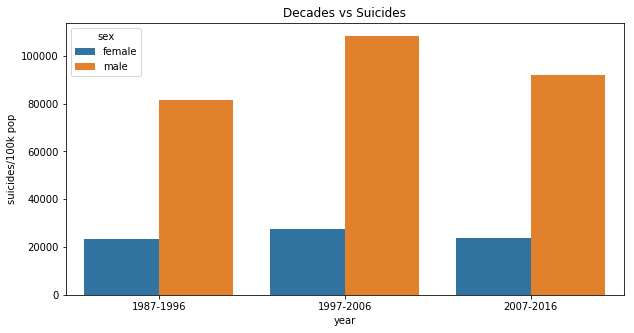

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x = "year", y = "suicides/100k pop", hue = "sex",data = first_obs.groupby(["year","sex"]).sum().reset_index()).set_title("Decades vs Suicides")

"1997 - 2006" decade has seen more deaths(suicides)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Gender wise Suicides')

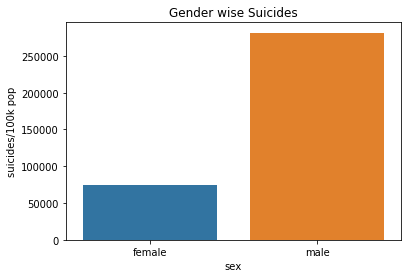

In [23]:
sns.barplot(x = "sex", y = "suicides/100k pop", data = first_obs.groupby("sex").sum().reset_index()).set_title("Gender wise Suicides")

As you see, male suicides are higher than female suicides

Country wise Suicide Analysis

In [24]:
country_sucides = first_obs.groupby("country").sum().reset_index()
country_sucides.head()

,country,suicides/100k pop
0,Albania,924.76
1,Antigua and Barbuda,179.14
2,Argentina,3894.59
3,Armenia,976.21
4,Aruba,1596.52


Which countries have less suicides?

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

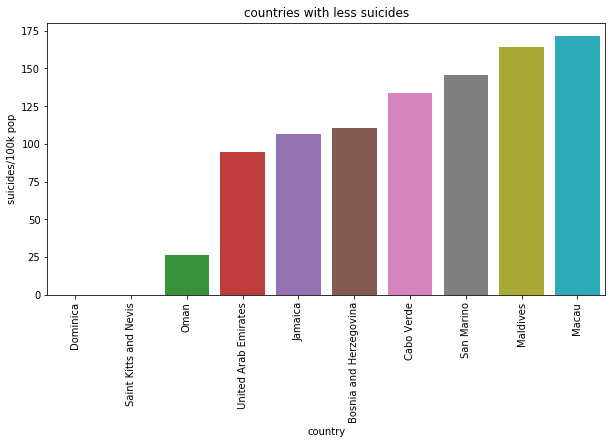

In [27]:
plt.figure(figsize=(10,5))
best_10 = country_sucides.sort_values(by = "suicides/100k pop",ascending= True)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("countries with less suicides")
plt.xticks(rotation = 90)

10 countries with most suicides

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

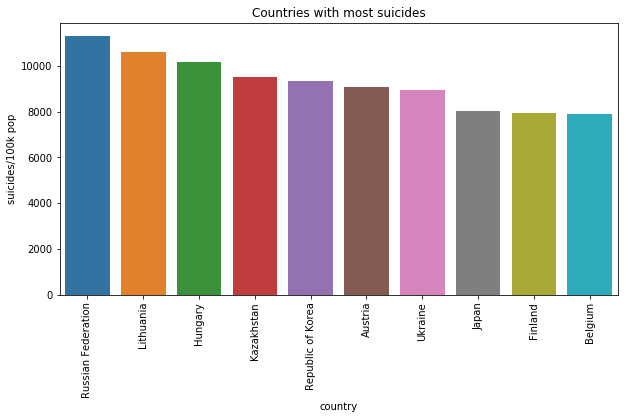

In [28]:
plt.figure(figsize=(10,5))
best_10 = country_sucides.sort_values(by = "suicides/100k pop",ascending= False)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("Countries with most suicides")
plt.xticks(rotation = 90)

Which countries have most/less suicides recently????

In [29]:
recent = first_obs[first_obs.year =="2007-2016"].groupby("country").sum().reset_index()
recent.head()

,country,suicides/100k pop
0,Albania,178.56
1,Antigua and Barbuda,23.60
2,Argentina,1294.98
3,Armenia,378.16
4,Aruba,327.93


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

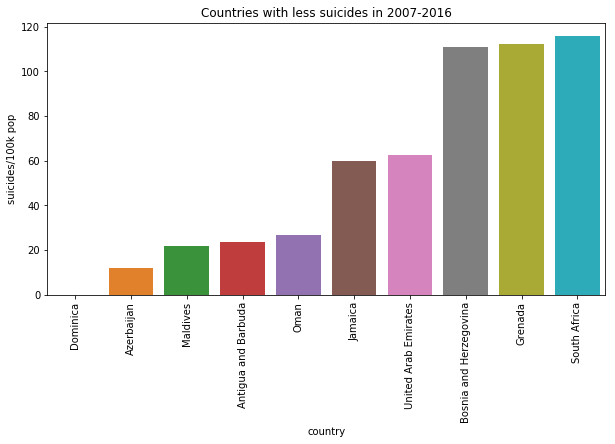

In [30]:
plt.figure(figsize=(10,5))
recent_best_10 = recent.sort_values(by = "suicides/100k pop")[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = recent_best_10).set_title("Countries with less suicides in 2007-2016")
plt.xticks(rotation = 90)

Countries with most suicides recently

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

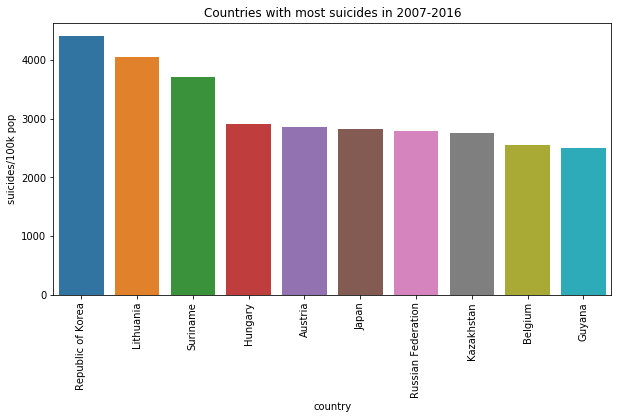

In [31]:
plt.figure(figsize=(10,5))
recent_bad_10 = recent.sort_values(by = "suicides/100k pop",ascending=False)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = recent_bad_10).set_title("Countries with most suicides in 2007-2016")
plt.xticks(rotation = 90)

DANGER ZONE Nations vs Safe Zone Nations

Danger Zone Nations are those nations,

where suicides are at increasing rate for 3 successive decades, then they are classified to DANGER ZONE NATIONS
Safe Zone Nations are those nations,

where suicides are at decreasing rate for 3 successive decades, then they are classified to Safe ZONE NATIONS
With this analysis,

we can understand whether GOVT taking any initiatives for decreasing suicide rate.
Why these specfic Nations have increasing Suicide rate?

In [32]:
zone_assess = first_obs.groupby(["country","year"]).sum().reset_index()
zone_assess.head()

,country,year,suicides/100k pop
0,Albania,1987-1996,264.62
1,Albania,1997-2006,481.58
2,Albania,2007-2016,178.56
3,Antigua and Barbuda,1987-1996,32.24
4,Antigua and Barbuda,1997-2006,123.30


In [33]:
#countries having data of three decades
three_gen = zone_assess.country.value_counts().reset_index(name = "count")
three_gen.columns = ["country", "counts"]
three_gen_countries = three_gen[three_gen.counts == 3].country.tolist()

In [34]:
nations = three_gen_countries
years = zone_assess.year.unique()
green_zones = []
danger_zones = []
for country in nations:
    s_year1 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "1987-1996")]["suicides/100k pop"])
    s_year2 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "1997-2006")]["suicides/100k pop"])
    s_year3 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "2007-2016")]["suicides/100k pop"])
    if s_year1 <= s_year2 <= s_year3:
        danger_zones.append(country)
    if s_year1 >= s_year2 >= s_year3:
        green_zones.append(country)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

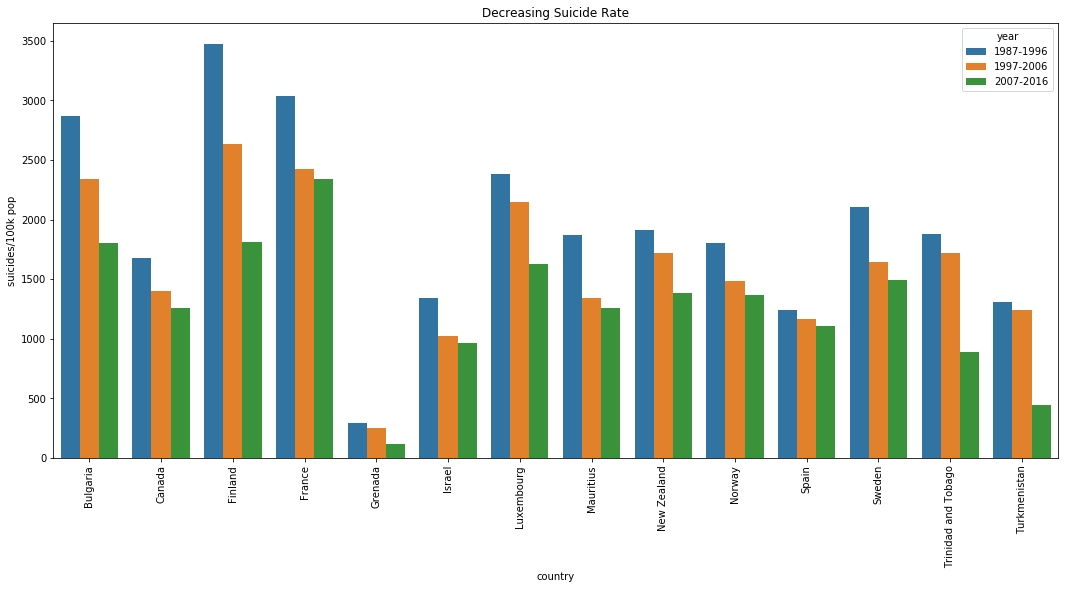

In [35]:
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_assess[zone_assess.country.isin(green_zones)]).set_title("Decreasing Suicide Rate")
plt.xticks(rotation = 90)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

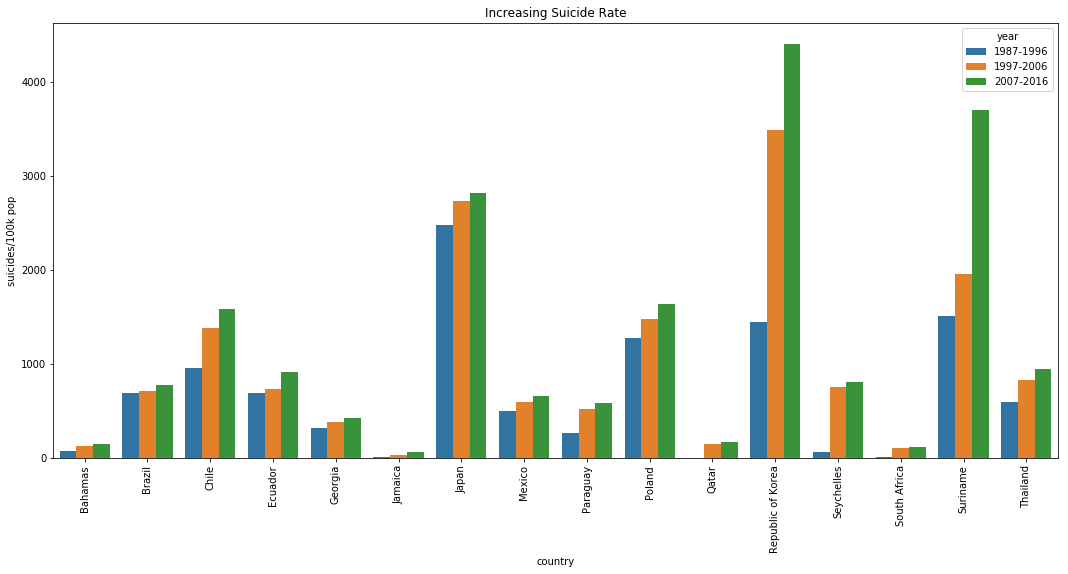

In [36]:
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_assess[zone_assess.country.isin(danger_zones)]).set_title("Increasing Suicide Rate")
plt.xticks(rotation = 90)

Suicides are increasing in above nations.Especially, Republic of Korea and Suriname countries have a greater suicide increasing rate.

In [ ]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

Since this report is meant for  health department. For visualizations porpuses we will create a map and ping point a health deparment of the USA

Adding the package to use foliums and maps

In [3]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  24.76 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  35.55 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  52.94 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  33.74 MB/s
vincent-0.4.4- 100% |###################

In [13]:
import requests # library to handle requests

Now we add the credentials to use FourSquare

In [8]:
CLIENT_ID = 'ZGIJ3A2VFWGK1PGY2AUM4C0XYOWYMSSJTXWRVYKTKGAZNDNS' # your Foursquare ID
CLIENT_SECRET = 'HTNJWYVZXU423053QWAXAPBGUE3RVTABYTE0HHUMLUMLVMKR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZGIJ3A2VFWGK1PGY2AUM4C0XYOWYMSSJTXWRVYKTKGAZNDNS
CLIENT_SECRET:HTNJWYVZXU423053QWAXAPBGUE3RVTABYTE0HHUMLUMLVMKR


In [9]:
address = '200 Independence Avenue, Washington'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.3382958 -88.4085698


In [10]:
search_query = 'Health'
radius = 500

In [11]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZGIJ3A2VFWGK1PGY2AUM4C0XYOWYMSSJTXWRVYKTKGAZNDNS&client_secret=HTNJWYVZXU423053QWAXAPBGUE3RVTABYTE0HHUMLUMLVMKR&ll=43.3382958,-88.4085698&v=20180605&query=Health&radius=500&limit=30'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c746dc2351e3d13a77b5548'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'primary': True,
      'shortName': 'Office'}],
    'hasPerk': False,
    'id': '4d2ca64f55a8b60c8fd3f1c0',
    'location': {'address': '1550 Innovation Way',
     'cc': 'US',
     'city': 'Hartford',
     'country': 'United States',
     'distance': 324,
     'formattedAddress': ['1550 Innovation Way',
      'Hartford, WI 53027',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.33548881737705,
       'lng': -88.40963837104778}],
     'lat': 43.33548881737705,
     'lng': -88.40963837104778,
     'postalCode': '53027',
     'state': 'WI'},
    'name': 'API Healthcare',
    'referralId': 'v-1551134146'}]}}

In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='HealthDepartment',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# display map
venues_map